In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

### Q 1-3 Using the 'diamonds' dataset - sns.load_dataset('diamonds')
- Create a violinplot of 'price' grouped by 'cut'.
- Create regplot on carat vs price. and give hue on 'cut'
- Create boxplot on 'color' and 'price'

In [3]:
#Create a violinplot of 'price' grouped by 'cut'.
diamond = sns.load_dataset("diamonds")
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


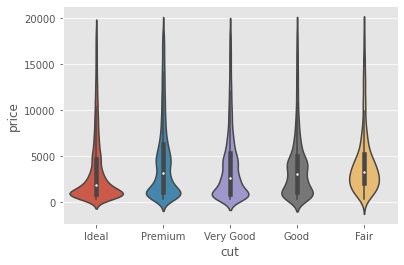

In [13]:
sns.violinplot(data=diamond,x="cut",y="price")
plt.show()

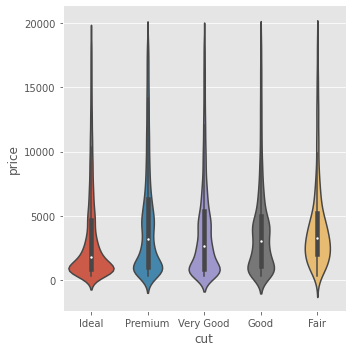

In [15]:
sns.catplot(data=diamond,x="cut",y="price",kind="violin")

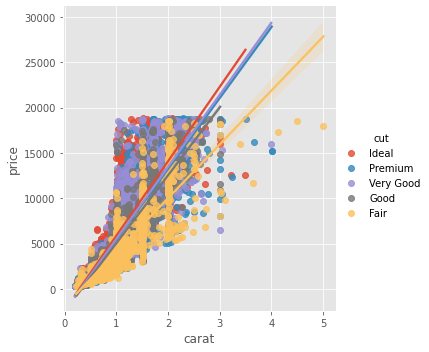

In [22]:
#Create regplot on carat vs price. and give hue on 'cut'
sns.lmplot(data=diamond,x="carat",y="price",hue="cut")

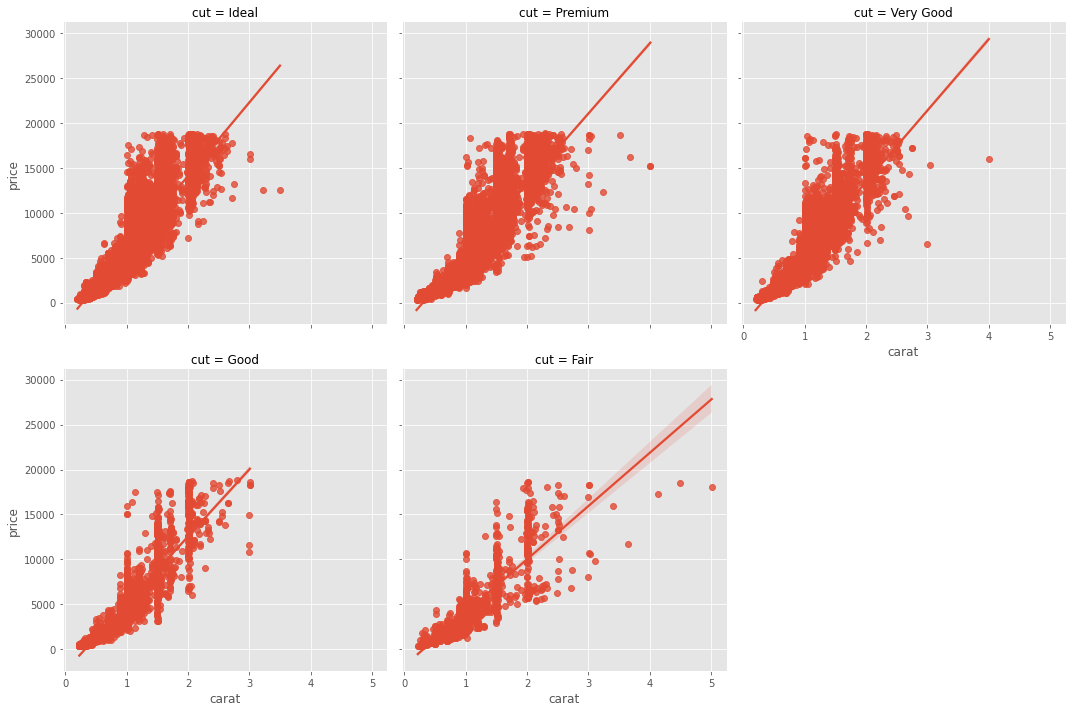

In [24]:
sns.lmplot(data=diamond,x="carat",y="price",col="cut",col_wrap=3)

<AxesSubplot: xlabel='color', ylabel='price'>

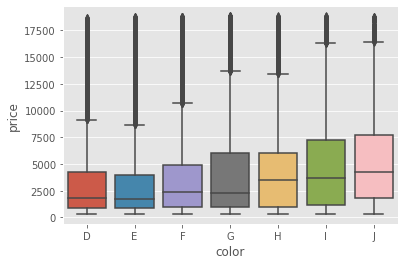

In [25]:
#Create boxplot on 'color' and 'price'
sns.boxplot(data=diamond,x="color",y="price")

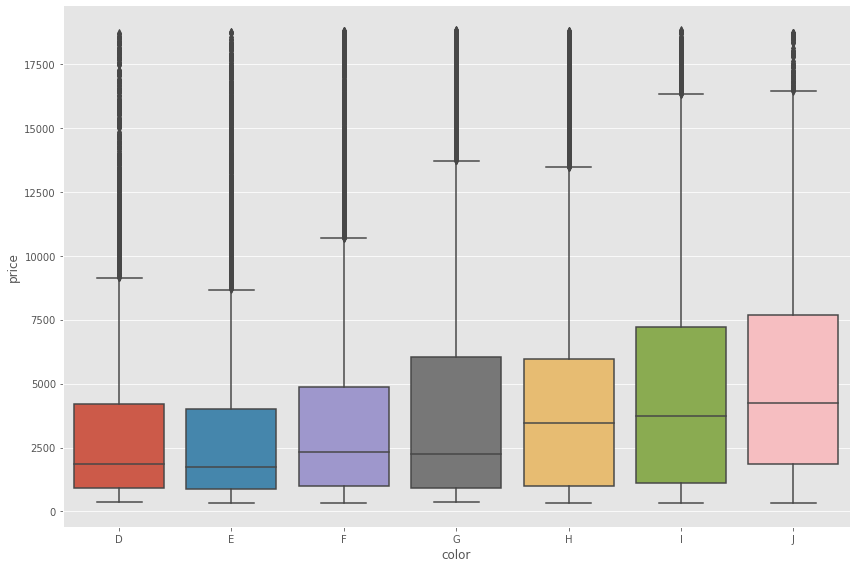

In [27]:
sns.catplot(data=diamond,x="color",y="price",kind="box",height=8,aspect=1.5)

### Q 4 Using the 'Taxis' dataset - sns.load_dataset('taxis')
- 4.1. Create a categorical estimate plot of the totl fare - 'total' for each payment type - 'payment'.
- 4.2. Create a regression plot on time of ride vs total fare. You will need to calculate ride time using pickup and dropoff column.
- 4.3 Give hue on payment type. and Another plot hue on taxi 'color'. Observe the plot.

In [87]:
taxis = sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


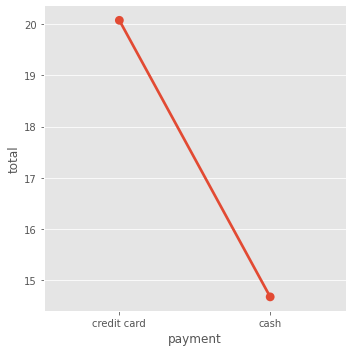

In [88]:
#Create a categorical estimate plot of the totl fare - 'total' for each payment type - 'payment'.
sns.catplot(data=taxis,x="payment",y="total",kind="point",errorbar=('ci',0))

In [89]:
#Create a regression plot on time of ride vs total fare. You will need to calculate ride time using pickup and dropoff column.
time = taxis["dropoff"]-taxis["pickup"]
taxis["time"] = time.apply(lambda x : round((x.total_seconds()/60),2))

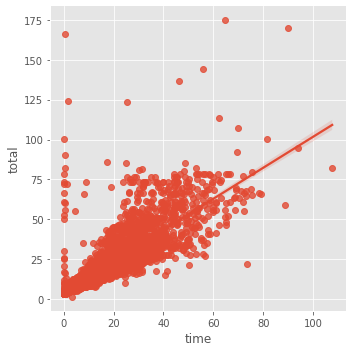

In [91]:
#Create a regression plot on time of ride vs total fare. You will need to calculate ride time using pickup and dropoff column.
sns.lmplot(data=taxis,x="time",y="total")

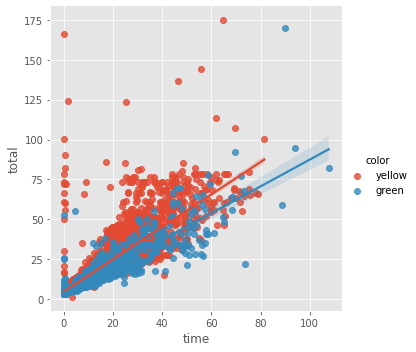

In [93]:
sns.lmplot(data=taxis,x="time",y="total",hue="color")

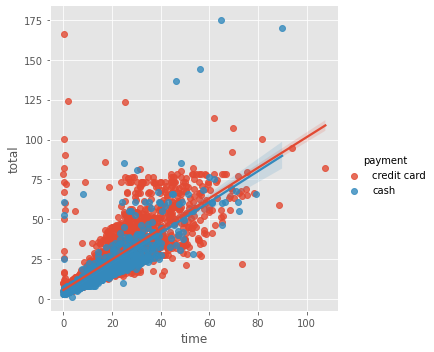

In [94]:
sns.lmplot(data=taxis,x="time",y="total",hue="payment")

### Problem 5-12:
### Problem 5: Draw a strip plot and swarm plot between "gender" and "bloodpressure" w.r.t "smoker" (use as hue parameter). Also add title to the charts.

In [97]:
insurance = pd.read_csv(r"C:\Users\ASUS\Downloads\insurance_data - insurance_data.csv").drop("index",axis=1)
insurance.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


Text(0.5, 1.0, 'BP vs Gender vs Smoker')

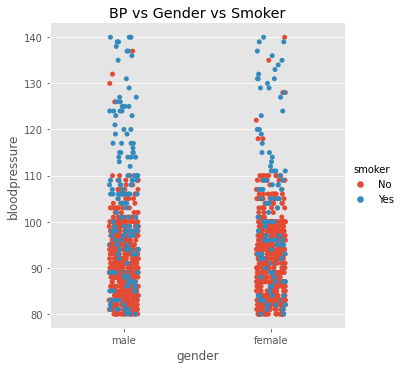

In [101]:
sns.catplot(data=insurance,x="gender",y="bloodpressure",hue="smoker",kind="strip")
plt.title("BP vs Gender vs Smoker")

Text(0.5, 1.0, 'BP vs Gender vs Smoker')

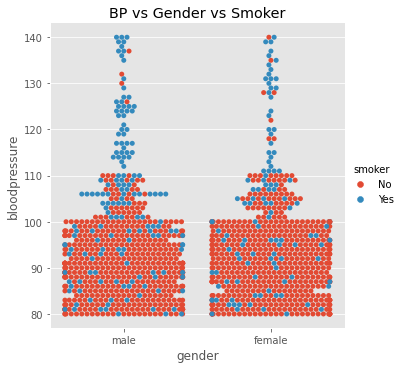

In [103]:
from warnings import filterwarnings
filterwarnings("ignore")
sns.catplot(data=insurance,x="gender",y="bloodpressure",hue="smoker",kind="swarm")
plt.title("BP vs Gender vs Smoker")
plt.show()

### Problem 6: Draw a Box-plot and a Violin plot of which x-axis represents the "region" and the y-axis represents the "bmi". Also add extra information of the column "diabetic".

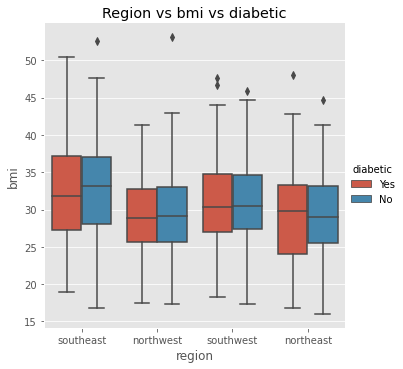

In [110]:
sns.catplot(data=insurance,x="region",y="bmi",kind="box",hue="diabetic")
plt.title("Region vs bmi vs diabetic")
plt.show()

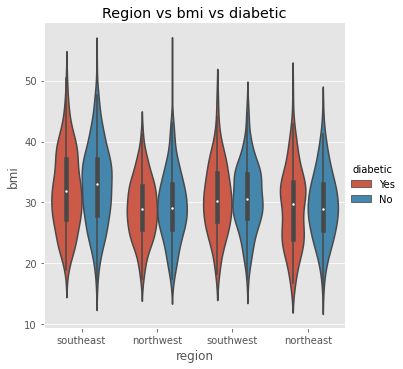

In [111]:
sns.catplot(data=insurance,x="region",y="bmi",kind="violin",hue="diabetic")
plt.title("Region vs bmi vs diabetic")
plt.show()

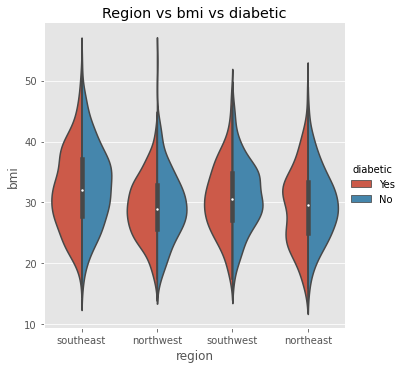

In [112]:
sns.catplot(data=insurance,x="region",y="bmi",kind="violin",hue="diabetic",split=True)
plt.title("Region vs bmi vs diabetic")
plt.show()

### Problem 7: Draw a bar plot and point plot of which x-axis represents the "gender" and y-axis represents "claim". Also add extra information about "smoker" column.

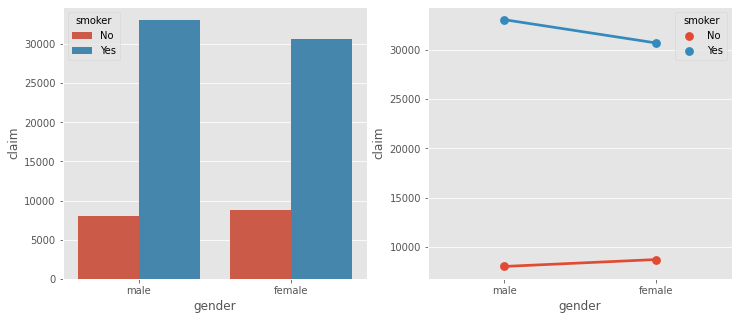

In [125]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.barplot(data=insurance,x="gender",y="claim",errorbar=('ci',0),hue="smoker",ax=ax[0])
sns.pointplot(data=insurance,x="gender",y="claim",errorbar=('ci',0),hue="smoker",ax=ax[1])
plt.show()

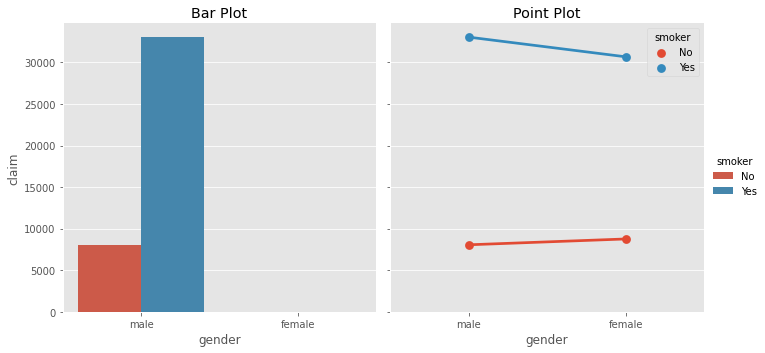

In [134]:
# Create a FacetGrid with catplot (barplot)
g = sns.catplot(data=insurance, x="gender", y="claim", hue="smoker",
                col="gender", kind="bar", errorbar=('ci',0), height=5, aspect=1)

# Modify the plot type for the second facet to be a point plot
g.axes[0][1].clear()  # Clear the second facet
sns.pointplot(data=insurance, x="gender", y="claim", hue="smoker",
              errorbar=('ci',0), ax=g.axes[0][1])

# Add titles
g.axes[0][0].set_title("Bar Plot")
g.axes[0][1].set_title("Point Plot")

plt.show()


### Problem 8: Draw a reg plot between "age" and "bmi" columns.

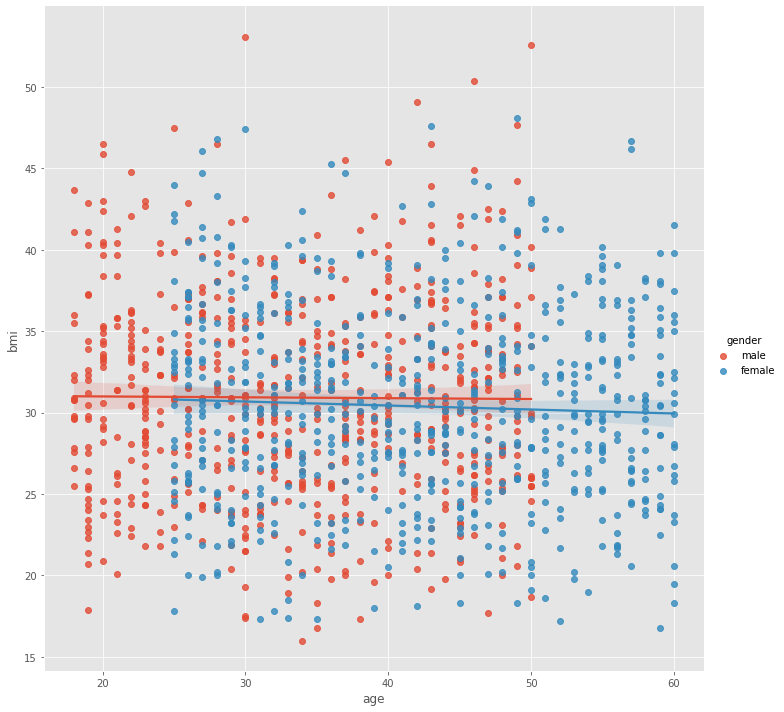

In [138]:
sns.lmplot(data=insurance,x="age",y="bmi",hue="gender",height=10)

### Problem 9: Draw a pair plot of the insurance data. Use "gender" as hue parameter.

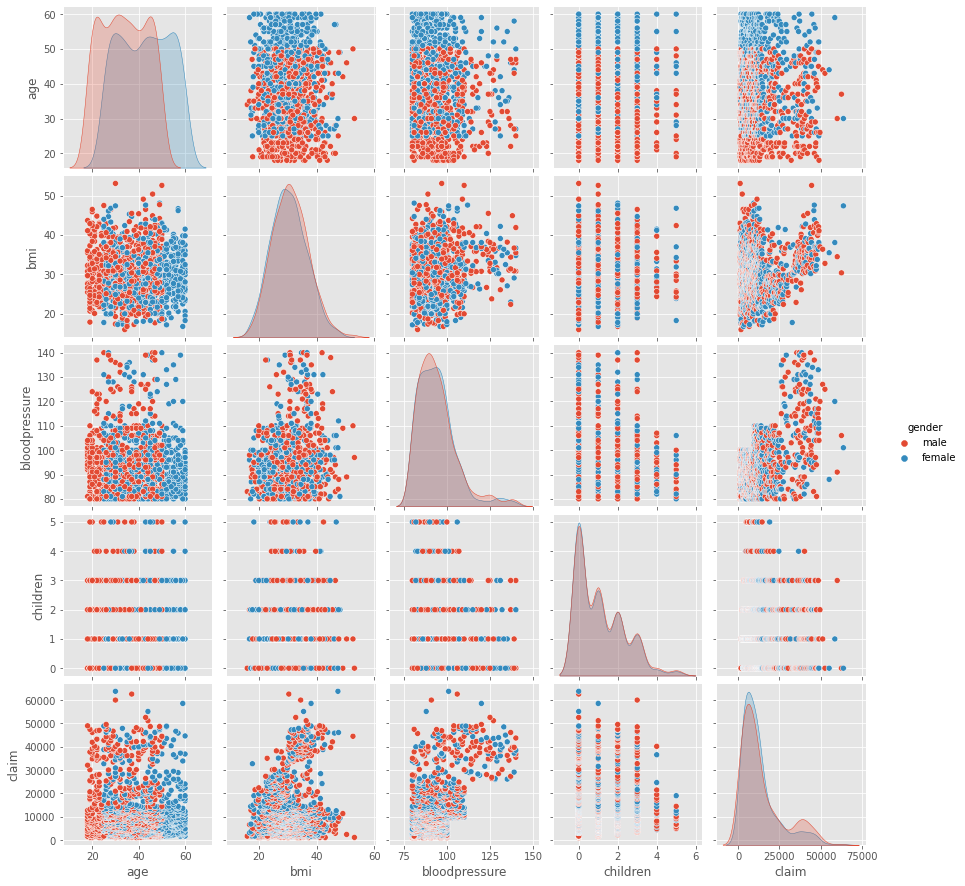

In [141]:
sns.pairplot(data=insurance.drop("PatientID",axis=1),hue="gender")

### Problem 10: Draw a pair grid of the insurance data and use "diabetic" column as a hue parameter. Also, make the diagonal plots as box-plot, upper parts as scatter plot and the lower parts as kde plot.

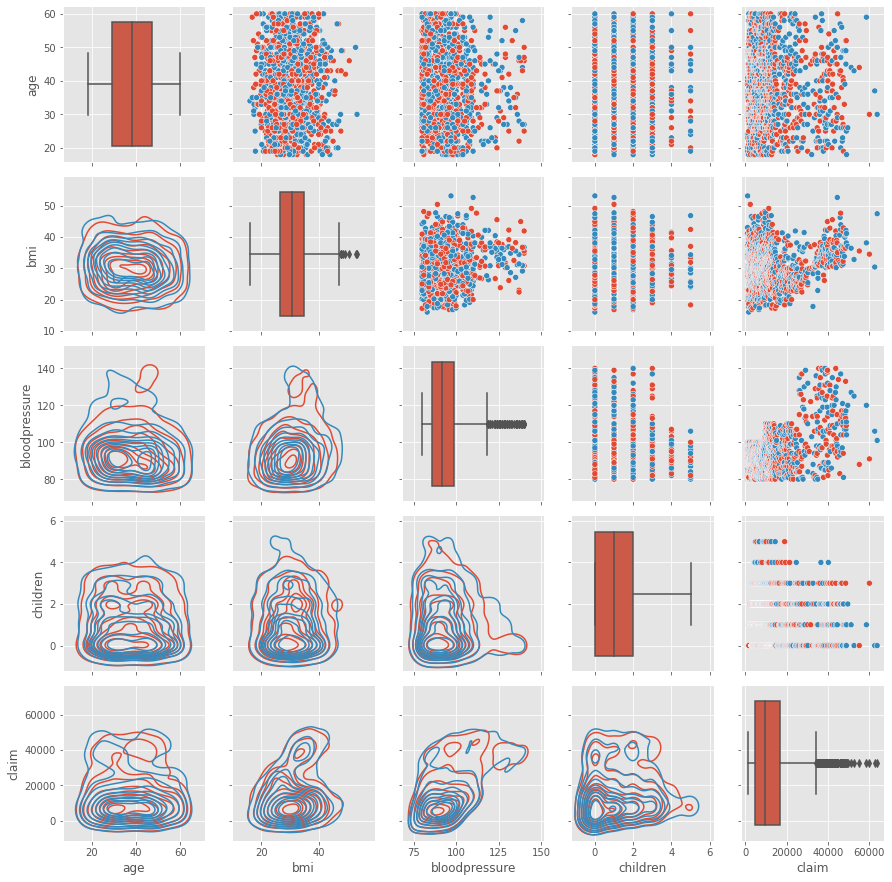

In [143]:
g = sns.PairGrid(data=insurance.drop("PatientID",axis=1),hue="diabetic")
g.map_diag(sns.boxplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

### Prolem 11: Draw a joint plot as scatter between "bloodpressure" and "bmi". Use "smoker" as hue parameter.

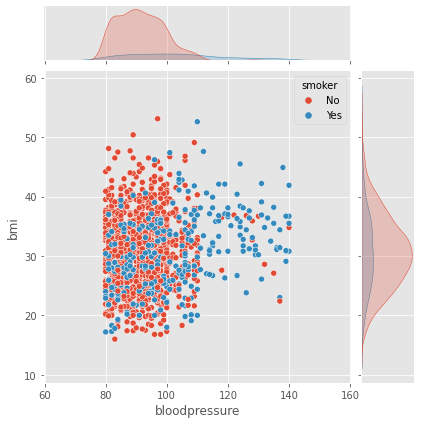

In [144]:
sns.jointplot(data=insurance,x="bloodpressure",y="bmi",hue="smoker",kind="scatter")

### Problem 12: Draw a joint grid of which x-axis represents "age" and y-axis represents "claim". Draw a kdeplot at center voilinplot for individual variable

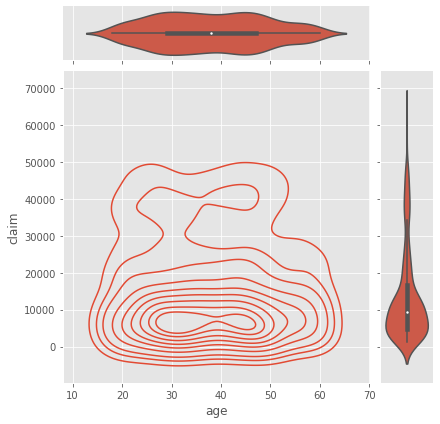

In [146]:
g = sns.JointGrid(data=insurance,x="age",y="claim")
g.plot(sns.kdeplot,sns.violinplot)